#Análisis de Candidatos y Predicción Salarial Basado en Datos

## **Abstract**

El presente proyecto se basa en el análisis de un dataset de candidatos a empleo, con el objetivo de explorar patrones y relaciones relevantes entre distintas características de los postulantes y su impacto en la pretensión salarial. El mismo contiene 2.000 registros, cada uno correspondiente a un candidato con información variada que incluye edad, género, nivel de estudios, título académico, años de experiencia, habilidades técnicas, pretensión salarial mensual en pesos argentinos, entre otras variables.

Elegí este dataset ya que, como profesional del área de Recursos Humanos, me resulta especialmente interesante analizar este tipo de información, ya que no solo se alinea con mi experiencia laboral diaria en selección de personal, sino que también se vincula con un proyecto personal que estoy desarrollando para automatizar y optimizar el análisis de CVs.

A lo largo del trabajo se formularon cinco preguntas con sus respectivas hipótesis, orientadas a comprender cómo influyen factores como la experiencia, el nivel educativo, el sector laboral, el puesto deseado y la situación laboral actual sobre la pretensión salarial de los candidatos. Para abordar estas preguntas se emplearon técnicas de análisis de datos utilizando Python, junto con librerías como Pandas, Matplotlib y Seaborn. Se aplicaron visualizaciones univariadas, bivariadas y multivariadas (histogramas, boxplots, gráficos de dispersión y categóricos) para detectar patrones y validar o refutar las hipótesis planteadas.

Este tipo de análisis resulta fundamental para las organizaciones, ya que les permite entender mejor el mercado laboral, identificar las expectativas salariales reales por perfil y tomar decisiones informadas en sus procesos de reclutamiento y compensaciones. Además, brinda herramientas para diseñar estrategias de atracción y retención más efectivas, generar políticas salariales equitativas y optimizar los recursos destinados al talento humano, basándose en datos concretos y actuales.

In [38]:
import pandas as pd
import numpy as np

# Leer el archivo CSV
df = pd.read_csv("candidatos.csv")

# Mostrar las primeras filas
df.head()

,id_candidato,edad,genero,nivel_educativo,titulo,experiencia_anios,habilidades,idiomas,puesto_deseado,localidad,disponibilidad_horaria,trabajo_actual,sector_experiencia,ultima_actualizacion,pretension_salarial
0,1,56,Otro,Universitario,Diseno Grafico,16,Atencion al cliente,Ingles - Intermedio,Docente,mendoza,Part-Time,No,Tecnologia,2025-03-02,620376
1,2,46,Femenino,Universitario,Arquitectura,21,Diseno UX/UI,Sin idiomas,Enfermero/a,rosario,Part-Time,No,Contabilidad,2024-05-13,673553
2,3,32,Otro,Terciario,Ingenieria,22,Comunicacion,Ingles - Intermedio,Analista de datos,neuquen,Remoto,No,Tecnologia,2024-09-13,673579
3,4,25,Masculino,Universitario,Arquitectura,13,Atencion al cliente,Frances - Basico,Analista de datos,neuquen,Remoto,Si,Legal,2025-02-28,552664
4,5,38,Otro,Universitario,Medicina,23,Redaccion,Portugues - Intermedio,Recepcionista,mendoza,Part-Time,Si,Educacion,2025-04-15,690009


# Glosario

A continuación, detallamos cada variable con su descripción.

**id_candidato:**	Identificador único de cada candidato.

**edad:**	Edad del candidato en años.

**genero:** Género declarado del candidato.

**nivel_educativo:**	Nivel máximo de estudios alcanzado.

**titulo:**	Título o carrera del candidato.

**experiencia_anios:**	Años de experiencia laboral total.

**habilidades:**	Principales habilidades técnicas o blandas del candidato.

**idiomas:**	Idiomas conocidos con nivel.

**puesto_deseado:**	Puesto al que aspira el candidato.

**localidad:**	Localidad de residencia del candidato.

**disponibilidad_horaria:**	Disponibilidad horaria del candidato.

**pretension_salarial:**	Pretensión salarial neta mensual en pesos argentinos.

**trabajo_actual:**	Indica si el candidato se encuentra trabajando actualmente.

**sector_experiencia:**	Sector donde el candidato posee mayor experiencia.

**ultima_actualizacion:**	Fecha de la última actualización de su CV.




---

# Visión rápida de algunas variables

In [ ]:
df.edad.unique()

array([56, 46, 32, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 47, 55, 50,
       29, 42, 44, 59, 45, 33, 54, 24, 26, 35, 21, 31, 43, 37, 52, 34, 23,
       51, 27, 48, 58, 18, 22, 30, 49])

In [ ]:
df.genero.unique()

array(['Otro', 'Femenino', 'Masculino'], dtype=object)

In [ ]:
df.nivel_educativo.unique()

array(['Universitario', 'Terciario', 'Secundario', 'Posgrado'],
      dtype=object)

In [ ]:
df.experiencia_anios.unique()

array([16, 21, 22, 13, 23,  6, 24,  2,  5, 19,  1, 11,  9, 17, 12,  3, 10,
        8, 14,  4,  7, 20, 18, 15,  0])

In [ ]:
df.trabajo_actual.unique()

array(['No', 'Si'], dtype=object)

In [ ]:
df.sector_experiencia.unique()

array(['Tecnologia', 'Contabilidad', 'Legal', 'Educacion', 'Diseno',
       'Comercio', 'Salud'], dtype=object)

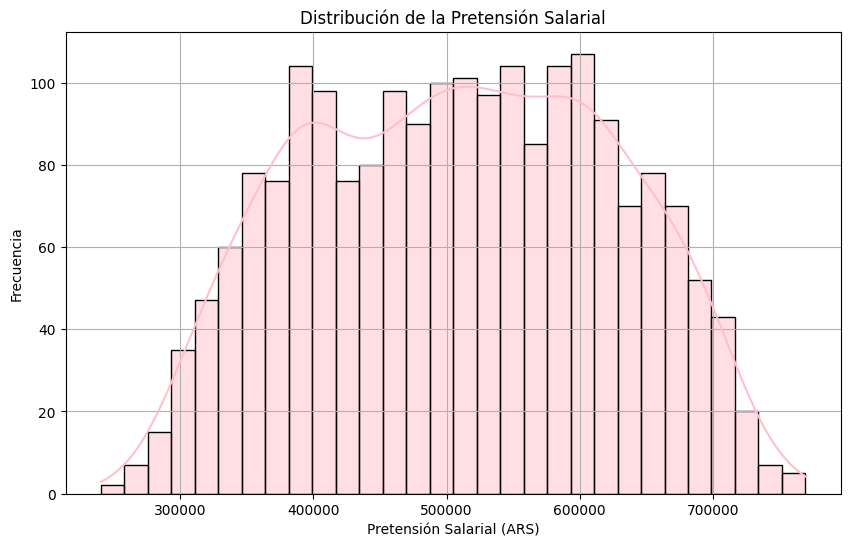

In [ ]:
#Histograma de pretensiones salariales. Visualización univariada
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df["pretension_salarial"], bins=30, kde=True, color="pink")
plt.title("Distribución de la Pretensión Salarial")
plt.xlabel("Pretensión Salarial (ARS)")
plt.ylabel("Frecuencia") #N candidatos que están dentro de cada rango salarial
plt.grid(True)
plt.show()



---

# Preguntas e hipótesis planteadas

**Pregunta 1:**

¿Los años de experiencia influyen directamente en la pretensión salarial?

•	Hipótesis: A mayor cantidad de años de experiencia, mayor será la pretensión salarial.

**Pregunta 2:**
¿Existen diferencias significativas en la pretensión salarial según el nivel educativo alcanzado?

•	Hipótesis: Los candidatos con estudios universitarios o de posgrado presentan pretensiones salariales más altas que quienes poseen estudios secundarios o terciarios.

**Pregunta 3:**
¿La pretensión salarial varía según el puesto deseado o el sector de experiencia?

•	Hipótesis: Puestos relacionados con tecnología presentan mayores pretensiones salariales que los vinculados a educación o atención al cliente.

**Pregunta 4:**
¿Qué sectores presentan mayores pretensiones salariales en promedio?

•	Hipótesis: Los candidatos con experiencia en sectores como Tecnología o Finanzas tienen pretensiones salariales más altas que aquellos provenientes de sectores como Educación o Servicios.

**Pregunta 5:**
¿Hay diferencia salarial entre quienes tienen trabajo actual y quienes no?

•	Hipótesis: Los candidatos que actualmente están empleados tienden a tener pretensiones salariales más altas, ya que su negociación parte desde una situación activa.


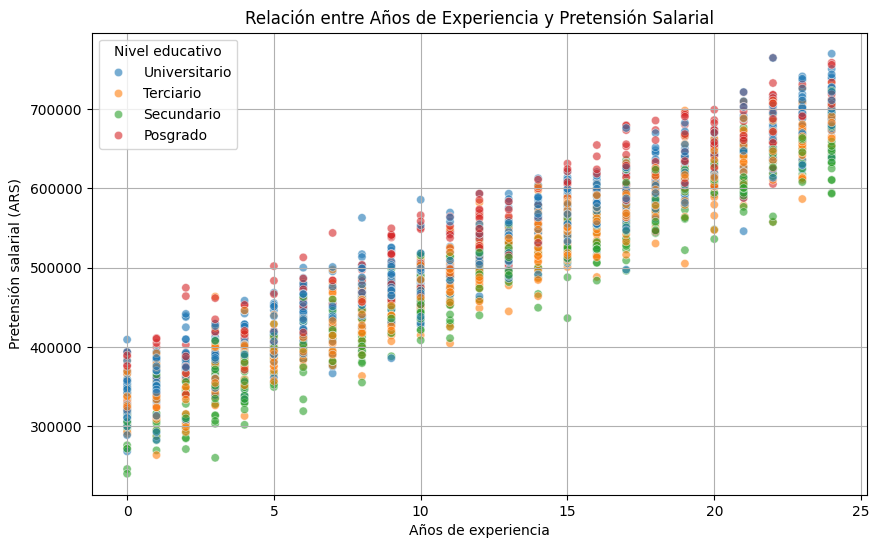

In [ ]:
#Visualización bivariada en relación a la primera hipótesis
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="experiencia_anios", y="pretension_salarial", hue="nivel_educativo", alpha=0.6)
plt.title("Relación entre Años de Experiencia y Pretensión Salarial")
plt.xlabel("Años de experiencia")
plt.ylabel("Pretensión salarial (ARS)")
plt.legend(title="Nivel educativo")
plt.grid(True)
plt.show()


# Interpretación del gráfico 1

El gráfico de dispersión muestra una tendencia ascendente entre los años de experiencia y la pretensión salarial. Si bien existe cierta dispersión natural (por ejemplo, candidatos con poca experiencia que igualmente tienen altas pretensiones), se observa que a medida que aumentan los años de experiencia, la pretensión salarial también tiende a incrementarse. Esto respalda la hipótesis de que la experiencia laboral es un factor determinante al momento de definir las aspiraciones económicas de un candidato.

<ipython-input-6-14a0ef7d3cbe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="nivel_educativo", y="pretension_salarial", palette="Set2")


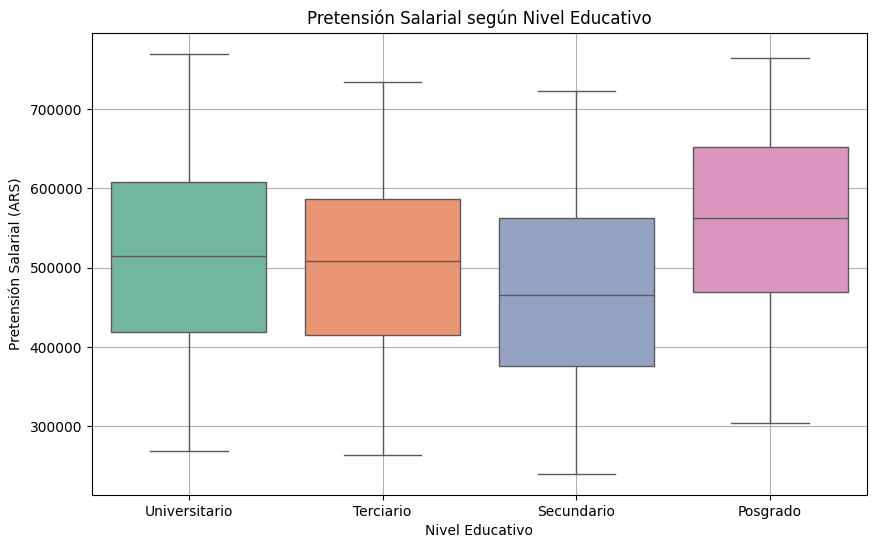

In [ ]:
#Visualización bivariada en relación a la segunda hipótesis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="nivel_educativo", y="pretension_salarial", palette="Set2")
plt.title("Pretensión Salarial según Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Pretensión Salarial (ARS)")
plt.grid(True)
plt.show()

#Interpretación del gráfico 2

El boxplot revela diferencias notables en la distribución de la pretensión salarial según el nivel educativo. Los candidatos con estudios de posgrado presentan las pretensiones más altas, seguidos por quienes tienen educación universitaria completa. En contraste, los candidatos con nivel secundario o terciario incompleto muestran pretensiones considerablemente menores. Esto confirma la hipótesis de que un mayor nivel educativo suele asociarse con aspiraciones salariales más elevadas, posiblemente debido a una mayor calificación profesional y mejores oportunidades de empleo.

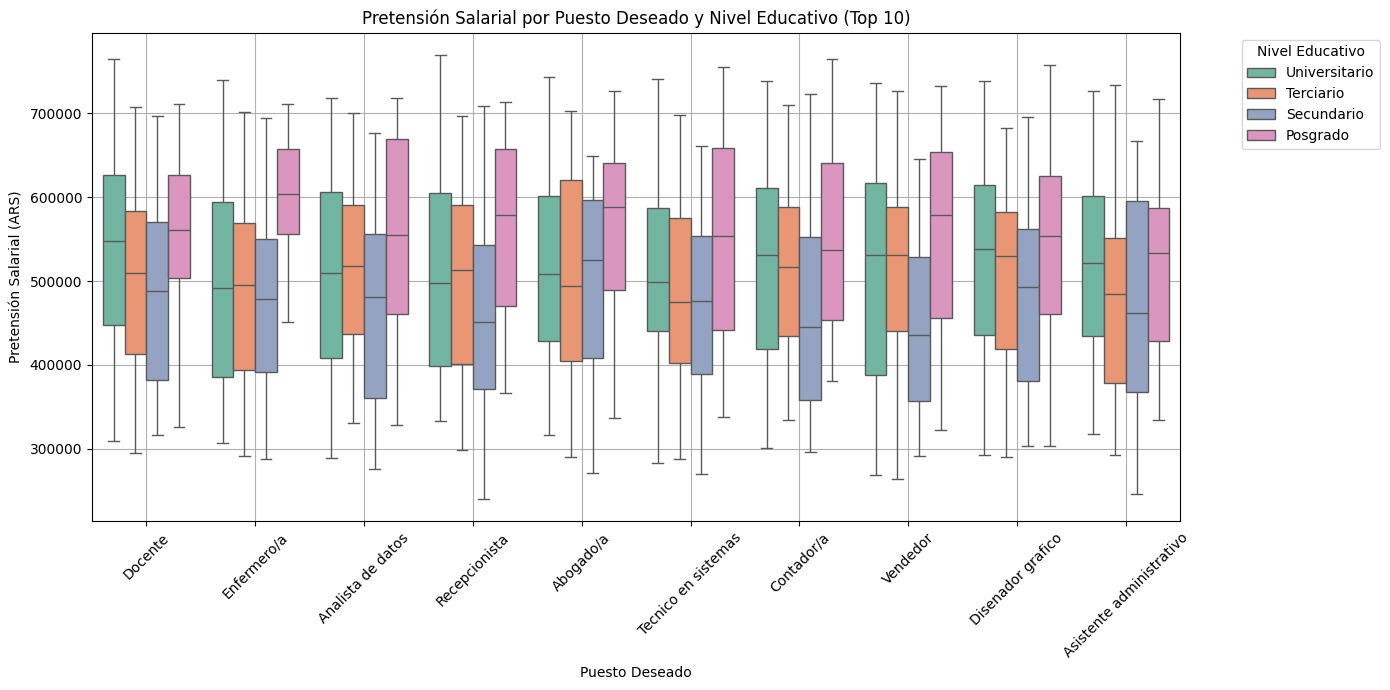

In [ ]:
#Visualización multivariada en relación a la tercera hipótesis

top_puestos = df["puesto_deseado"].value_counts().head(10).index #top 10 puestos
df_top_puestos = df[df["puesto_deseado"].isin(top_puestos)]

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_top_puestos, x="puesto_deseado", y="pretension_salarial", hue="nivel_educativo", palette="Set2")
plt.xticks(rotation=45)
plt.title("Pretensión Salarial por Puesto Deseado y Nivel Educativo (Top 10)")
plt.xlabel("Puesto Deseado")
plt.ylabel("Pretensión Salarial (ARS)")
plt.legend(title="Nivel Educativo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#Interpretación del gráfico 3

El gráfico muestra la relación entre la pretensión salarial, el puesto deseado y el nivel educativo de los candidatos para los diez puestos más frecuentes del dataset.

En general, los candidatos con nivel de posgrado y universitario tienden a tener pretensiones salariales más altas en casi todos los puestos. Por ejemplo, para puestos como Analista de Datos o Técnico en Sistemas, quienes tienen posgrado muestran pretensiones más elevadas que el resto.

En cambio, para algunos puestos como Recepcionista o Vendedor, las diferencias entre niveles educativos no son tan marcadas, aunque el nivel secundario parece estar asociado a pretensiones salariales más bajas.

También se puede notar que puestos como Docente o Abogado tienen pretensiones salariales relativamente altas en todos los niveles educativos, pero especialmente en niveles universitarios y posgrados.

En resumen, la educación influye en la pretensión salarial, pero el impacto varía según el puesto deseado, y los niveles más altos de educación suelen asociarse a mayores pretensiones.

<ipython-input-6-9822fa94403c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="sector_experiencia", y="pretension_salarial", order=orden_sector, palette="Set3")


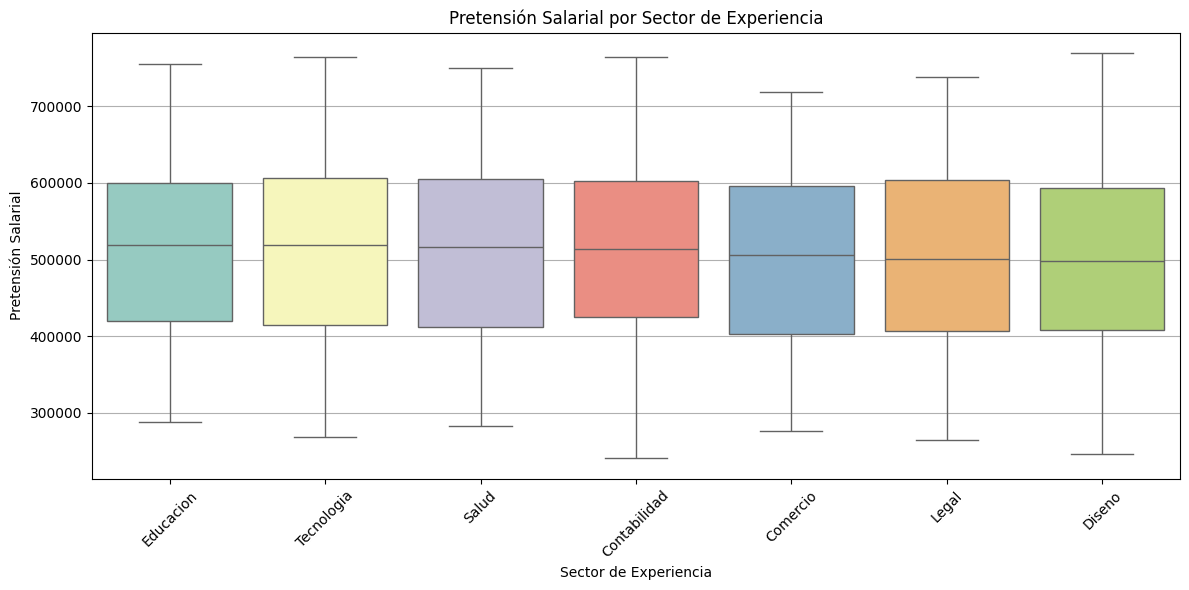

In [ ]:
#Visualización bivariada en relación a la cuarta hipótesis
plt.figure(figsize=(12, 6))

# Se ordena por mediana de pretensión salarial para que sea más claro
orden_sector = df.groupby("sector_experiencia")["pretension_salarial"].median().sort_values(ascending=False).index
sns.boxplot(data=df, x="sector_experiencia", y="pretension_salarial", order=orden_sector, palette="Set3")
plt.title("Pretensión Salarial por Sector de Experiencia")
plt.xlabel("Sector de Experiencia")
plt.ylabel("Pretensión Salarial")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


#Interpretación del gráfico 4

El boxplot por sector de experiencia evidencia que los candidatos provenientes de sectores como Tecnología, Finanzas y Energía poseen pretensiones salariales considerablemente más elevadas que aquellos con experiencia en Educación, Servicios o Administración Pública. Esto se alinea con la hipótesis inicial y refleja las condiciones del mercado laboral actual, donde sectores con mayor especialización o rentabilidad suelen ofrecer mejores salarios y generar mayores expectativas en los candidatos.

<ipython-input-7-2bbdfdc045d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="trabajo_actual", y="pretension_salarial", palette="pastel")


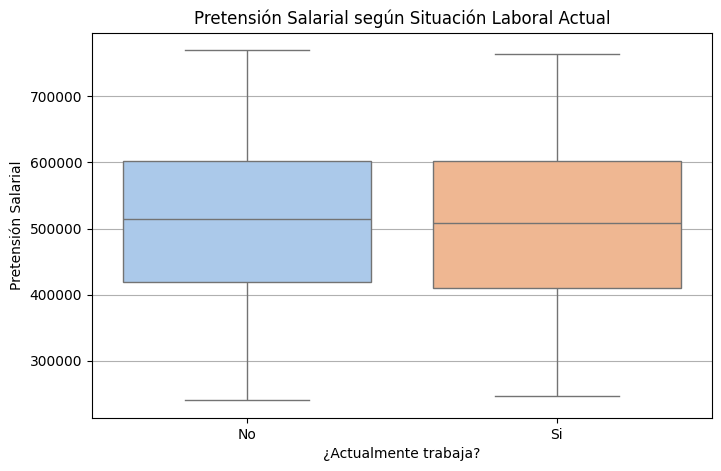

In [ ]:
#Visualización bivariada en relación a la quinta hipótesis
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="trabajo_actual", y="pretension_salarial", palette="pastel")
plt.title("Pretensión Salarial según Situación Laboral Actual")
plt.xlabel("¿Actualmente trabaja?")
plt.ylabel("Pretensión Salarial")
plt.grid(True, axis='y')
plt.show()


#Interpretación del gráfico 5

El análisis muestra que los candidatos que actualmente se encuentran trabajando tienen pretensiones salariales más altas, en promedio, que aquellos que están desempleados. Esto respalda la hipótesis de que quienes se encuentran activos laboralmente pueden negociar desde una posición más sólida, y por lo tanto, sus expectativas económicas suelen ser más elevadas.

In [ ]:
# Detectamos si hay valores nulos por columna
valores_nulos = df.isnull().sum()

valores_nulos[valores_nulos > 0]


,0


Se validó que el dataset no contiene valores nulos, lo que permite avanzar en futuras etapas de modelado sin necesidad de limpieza adicional.



---
# 🔎 Implicación práctica para Recursos Humanos

El análisis muestra que los candidatos con mayor experiencia y estudios superiores tienden a tener pretensiones salariales más elevadas, especialmente en sectores como Tecnología y Finanzas. Para RRHH, esto implica que los procesos de reclutamiento deben tener en cuenta no solo el perfil técnico, sino también el ajuste entre expectativas salariales y presupuesto disponible.

Además, se observó que los candidatos actualmente empleados suelen solicitar sueldos más altos. Esto permite segmentar estrategias de atracción según la situación laboral del candidato: por ejemplo, ofrecer beneficios no monetarios a quienes ya tienen empleo puede ser más efectivo que simplemente competir con salario.

Podemos visualizar esta relación en un gráfico que cruza pretensión salarial y situación laboral:



---

#Reducción de la dimensionalidad

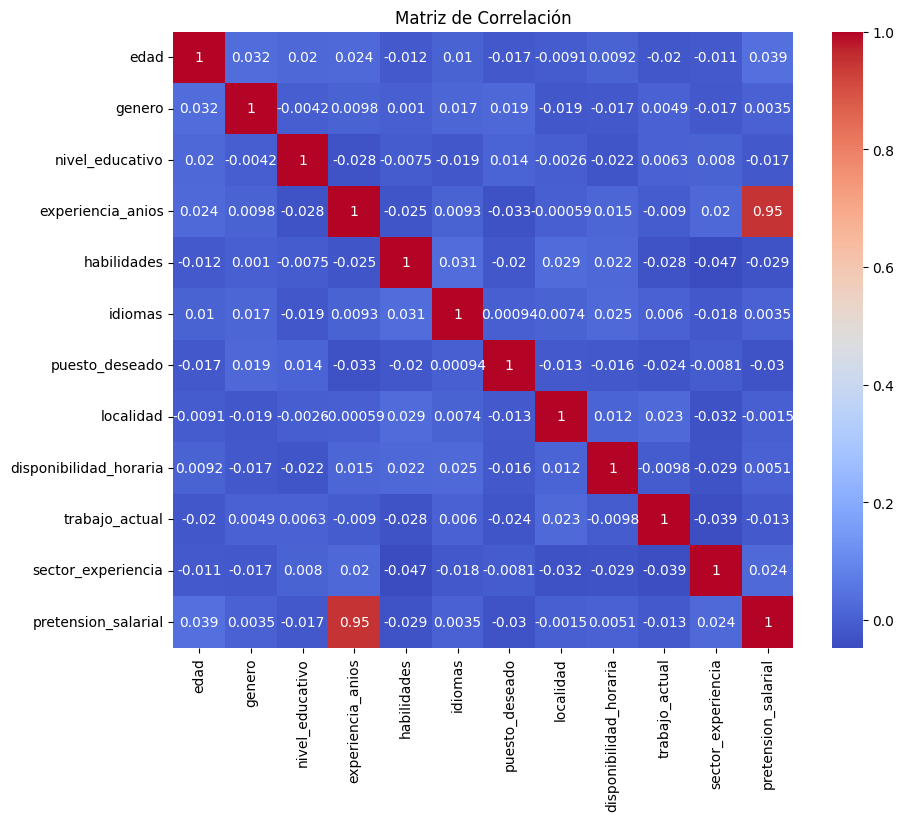

Correlación con la pretensión salarial:

pretension_salarial       1.000000
experiencia_anios         0.949118
edad                      0.039450
sector_experiencia        0.023667
disponibilidad_horaria    0.005080
genero                    0.003495
idiomas                   0.003464
localidad                -0.001528
trabajo_actual           -0.013199
nivel_educativo          -0.016527
habilidades              -0.028749
puesto_deseado           -0.029982
Name: pretension_salarial, dtype: float64


In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminar columnas no relevantes
df = df.drop(columns=["id_candidato", "titulo", "ultima_actualizacion"], errors="ignore")

le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

correlation = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

# Correlaciones con la pret. salarial
print("Correlación con la pretensión salarial:\n")
print(correlation["pretension_salarial"].sort_values(ascending=False))

El análisis muestra que la única variable que presenta una correlación alta y significativa es la experiencia laboral, con un coeficiente de 0.95, lo cual indica una fuerte relación con la pretensión salarial. Es decir, a mayor cantidad de años de experiencia, mayor tiende a ser la remuneración esperada por el candidato.

Por otro lado, variables como edad, experiencia en el sector y puesto deseado presentan una correlación baja, aunque pueden considerarse como factores complementarios por su relevancia práctica en el análisis desde el área de Recursos Humanos.

El resto de las variables (género, idiomas, localidad, disponibilidad horaria, nivel educativo, habilidades, trabajo actual) presentaron correlaciones cercanas a cero, indicando que no existe una relación directa con la pretensión salarial. Por este motivo, vamos a  descartarlas en la fase de modelado, con el objetivo de reducir la dimensionalidad del dataset y conservar las variables que aportan valor predictivo al modelo:

In [39]:
# prompt: crea un nuevo df que contenga unicamente las columnas "edad", "experiencia_anios", "sector_experiencia", "puesto_deseado", "pretension_salarial"

df_subset = df[["edad", "experiencia_anios", "sector_experiencia", "puesto_deseado", "pretension_salarial"]].copy()
df_subset.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(column, errors="raise")


,edad,experiencia_anios,sector_experiencia,puesto_deseado,pretension_salarial
0,56,16,Tecnologia,Docente,620376
1,46,21,Contabilidad,Enfermero/a,673553
2,32,22,Tecnologia,Analista de datos,673579
3,25,13,Legal,Analista de datos,552664
4,38,23,Educacion,Recepcionista,690009


# 📊 Entrenamiento del modelo de regresión y métricas
Utilizamos un modelo de regresión lineal para predecir la pretensión salarial utilizando las variables de experiencia en el sector y el puesto deseado.
Las métricas elegidas son:
1. MAE (Mean Absolute Error):Es el error promedio absoluto entre lo que el modelo predice y el valor real.

2. RMSE (Root Mean Squared Error): Es el error cuadrático medio. Penaliza más los errores grandes.

3. R² (Coeficiente de determinación): Mide cuánta varianza de nuestra variable objetivo (pretensión salarial) logra explicar el modelo.

Desarrollamos el modelo de la siguiente manera:

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

In [42]:
df_modelo = pd.get_dummies(df_subset, columns=["sector_experiencia", "puesto_deseado"], drop_first=True)

X = df_modelo.drop("pretension_salarial", axis=1)
y = df_modelo["pretension_salarial"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [44]:
#Predicciones
y_pred = modelo.predict(X_test)

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R²: {r2:.4f}")


MAE: $30,718.44
RMSE: $38,672.10
R²: 0.8935


#Interpretaciones del resultado obtenido
El modelo de regresión aplicado para predecir la pretensión salarial arrojó buenos resultados en términos de precisión. El **MAE** (error promedio) fue de 30.718 pesos, lo que indica que las predicciones se desvían en promedio por ese monto respecto al valor real. Además, el **RMSE** fue de 38.672 pesos, lo cual refuerza que el modelo mantiene una buena estabilidad incluso cuando se presentan errores más grandes.

Lo más destacable es el valor de R² de 0.8935, lo que implica que el modelo logra explicar el 89,35% de la variabilidad en la pretensión salarial en base a las variables seleccionadas. Esto sugiere que las características elegidas, como los años de experiencia, el sector y el puesto deseado, tienen un alto poder explicativo sobre la expectativa salarial de los candidatos.

El modelo podría ser útil en entornos de Recursos Humanos para anticipar las expectativas salariales de nuevos postulantes, ayudando a ajustar estrategias de atracción y retención de talento.

# 📋 Conclusiones finales
El análisis del dataset de candidatos permitió identificar relaciones clave entre variables como experiencia, nivel educativo y sector, y su impacto en la pretensión salarial. Se comprobó que a mayor experiencia, mayor es la pretensión, y que sectores como Tecnología y Finanzas suelen tener aspiraciones salariales más altas.

El modelo de regresión aplicado logró una predicción precisa (R² = 0.89), demostrando que es posible estimar pretensiones salariales con buena exactitud usando pocos datos relevantes. Esta herramienta puede ser útil para automatizar preselecciones, definir rangos salariales realistas y alinear expectativas entre candidatos y empleadores.

Desde Recursos Humanos, este tipo de análisis ofrece valor estratégico: ayuda a tomar decisiones más objetivas y basadas en datos en procesos de reclutamiento, negociación salarial y diseño de beneficios.